In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
### In order to read stock's data from online we have to import DataReader. Also we have to use Datetime object to create timeseries.
import pandas_datareader as pdr
from datetime import datetime

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']   # Created the list of companies.

# Created our timeline via datetime object
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [4]:
for stock in tech_list:
    globals() [stock] = pdr.DataReader(stock,'yahoo',start,end)

In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,190.817510,187.111740,188.954941,189.026206,3.235441e+07,187.652261
std,21.835395,21.514256,21.664266,21.667475,1.428593e+07,21.371806
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,174.770004,171.529999,173.000000,172.970001,2.276570e+07,172.109268
50%,189.220001,186.360001,188.000000,187.970001,2.840860e+07,186.072266
75%,209.250000,205.479996,207.279999,207.529999,3.876780e+07,205.875610
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-04-09 to 2019-04-09
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


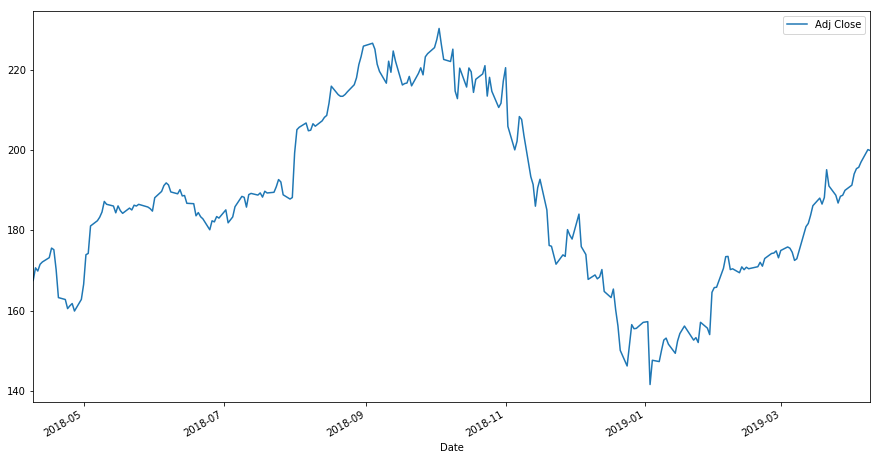

In [7]:
AAPL['Adj Close'].plot(legend = True, figsize = (15,8))   # Plotted Adjusted Close numbers of Apple.

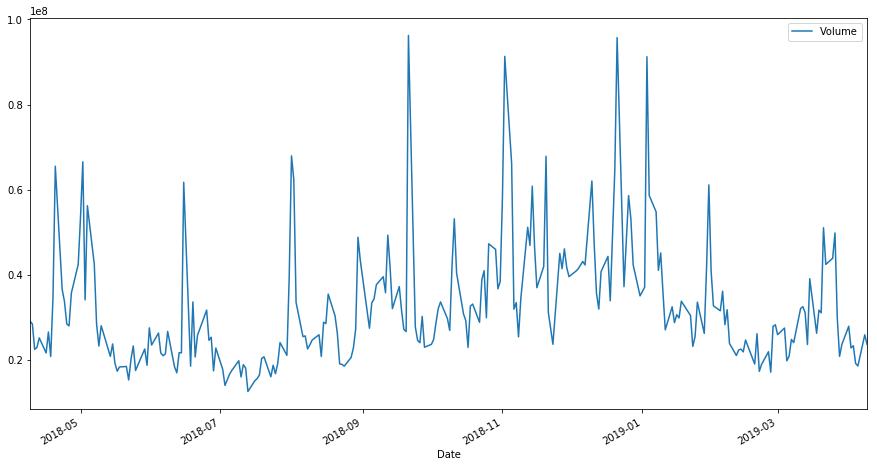

In [8]:
AAPL['Volume'].plot(legend = True, figsize =(15,8))      # Plotted the volume numbers of Apple.

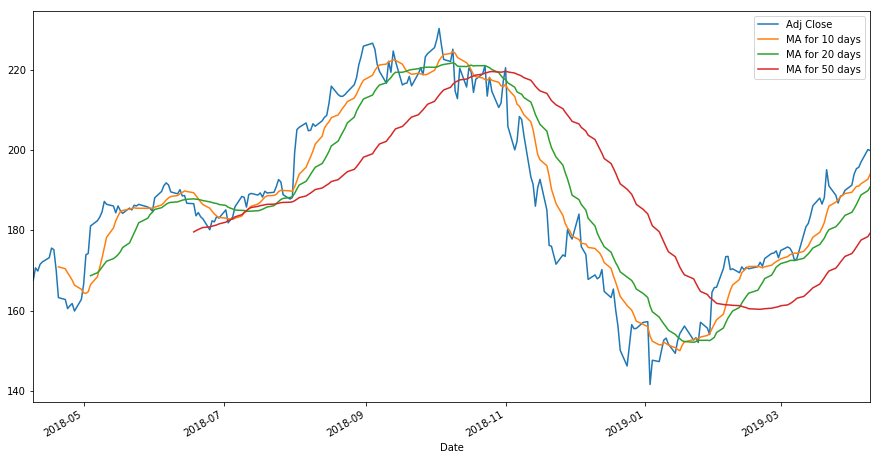

In [9]:
# Created the moving averages list of days.
ma_day = [10,20,50]
# Then we created a loop to make a new columns inside the company dataframe for MA calculations.
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = DataFrame.rolling(AAPL['Adj Close'],ma).mean()

    

# Then we plotted them together with Adj Close numbers.
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(legend = True,subplots = False, figsize = (15,8))

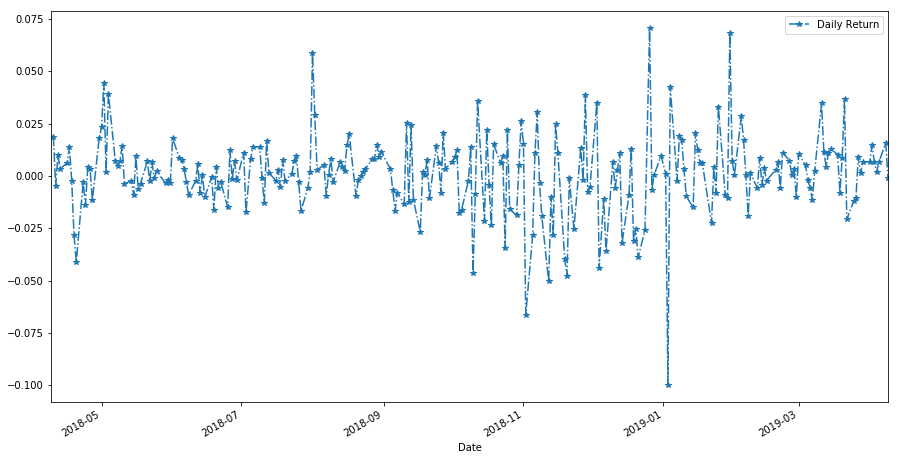

In [10]:
# Calculated daily returns as percentage.
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize =(15,8), legend = True, linestyle = '-.',marker = '*')

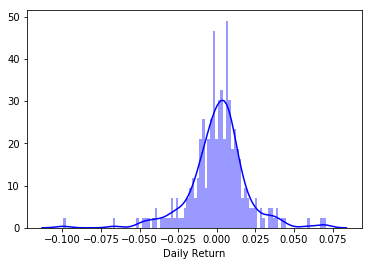

In [11]:
# Let's plot daily returns in histogram.

sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'blue')

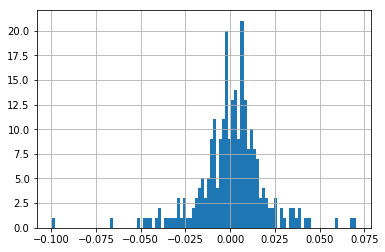

In [12]:
# Or we can use histogram method of matplotlib.
AAPL['Daily Return'].hist(bins = 100)

In [13]:
# We can also create a dataframe object to store adj close numbers of all companies in one dataframe.
closing_df = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close']

closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-09,167.499466,1406.079956,1015.450012,89.263313
2018-04-10,170.651459,1436.219971,1031.640015,91.338280
2018-04-11,169.853622,1427.050049,1019.969971,90.335213
2018-04-12,171.528107,1448.500000,1032.510010,92.026665
2018-04-13,172.109268,1430.790039,1029.270020,91.534966


In [14]:
# Now let's calculate return values from closing numbers.
tech_return = closing_df.pct_change()

tech_return.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-09,NaN,NaN,NaN,NaN
2018-04-10,0.018818,0.021435,0.015944,0.023245
2018-04-11,-0.004675,-0.006385,-0.011312,-0.010982
2018-04-12,0.009858,0.015031,0.012295,0.018724
2018-04-13,0.003388,-0.012226,-0.003138,-0.005343


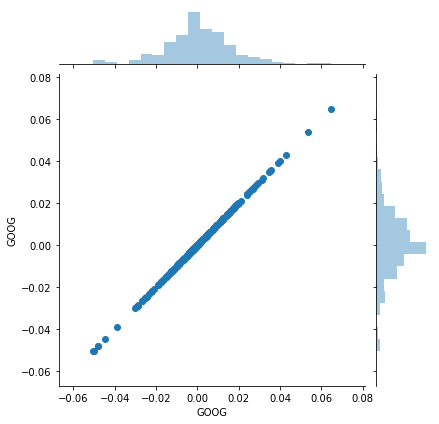

In [15]:
# Now let's check correlation between the companies.
sns.jointplot('GOOG','GOOG',tech_return,kind = 'scatter')

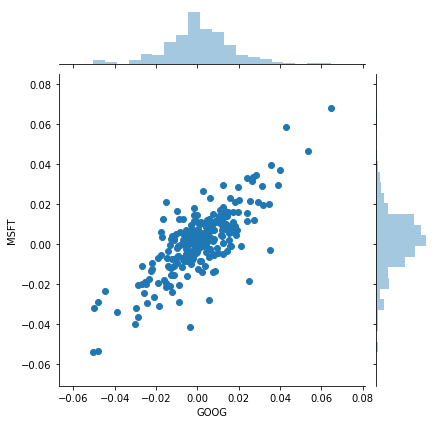

In [16]:
sns.jointplot('GOOG','MSFT',tech_return,kind = 'scatter')

In [17]:
tech_return.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-09,NaN,NaN,NaN,NaN
2018-04-10,0.018818,0.021435,0.015944,0.023245
2018-04-11,-0.004675,-0.006385,-0.011312,-0.010982
2018-04-12,0.009858,0.015031,0.012295,0.018724
2018-04-13,0.003388,-0.012226,-0.003138,-0.005343


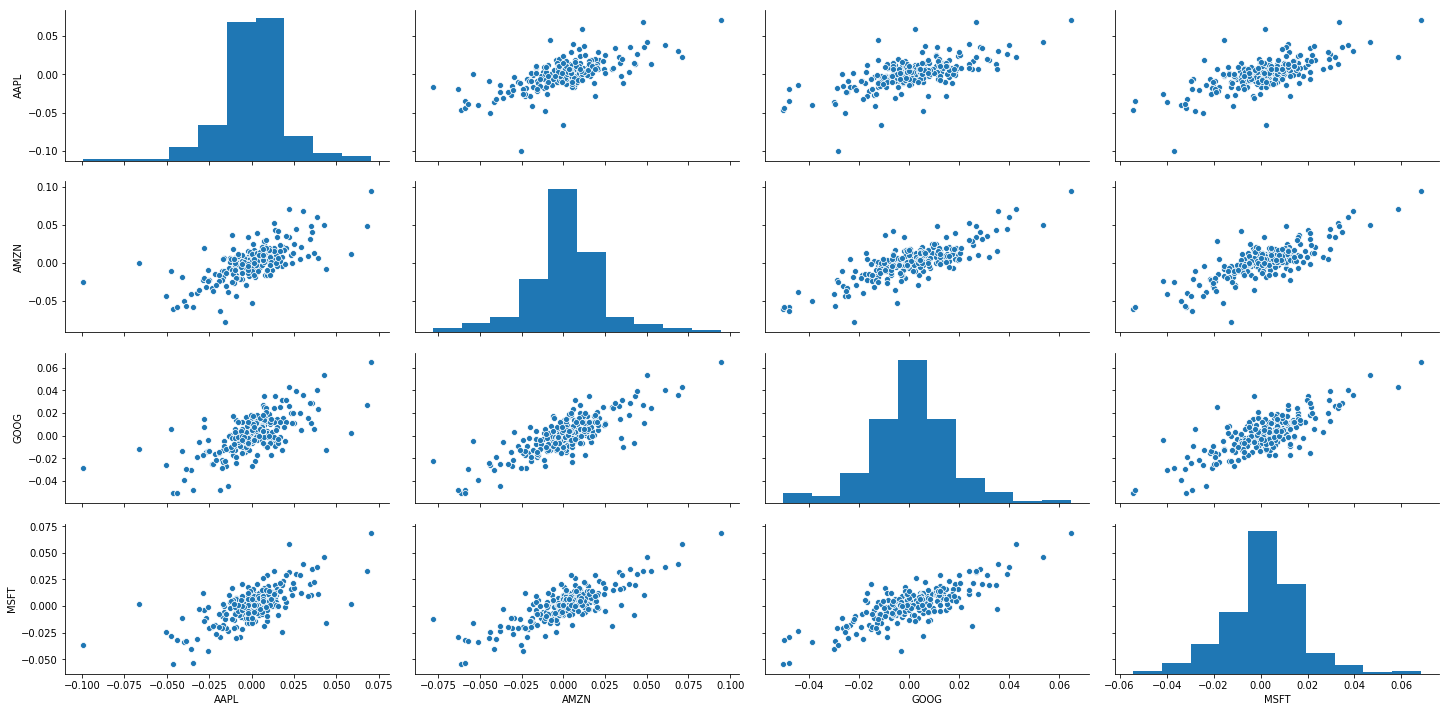

In [18]:
# So we can use Seaborn's pairplot to plot all the correlation graphs in one plot.

sns.pairplot(tech_return.dropna(),aspect = 2)

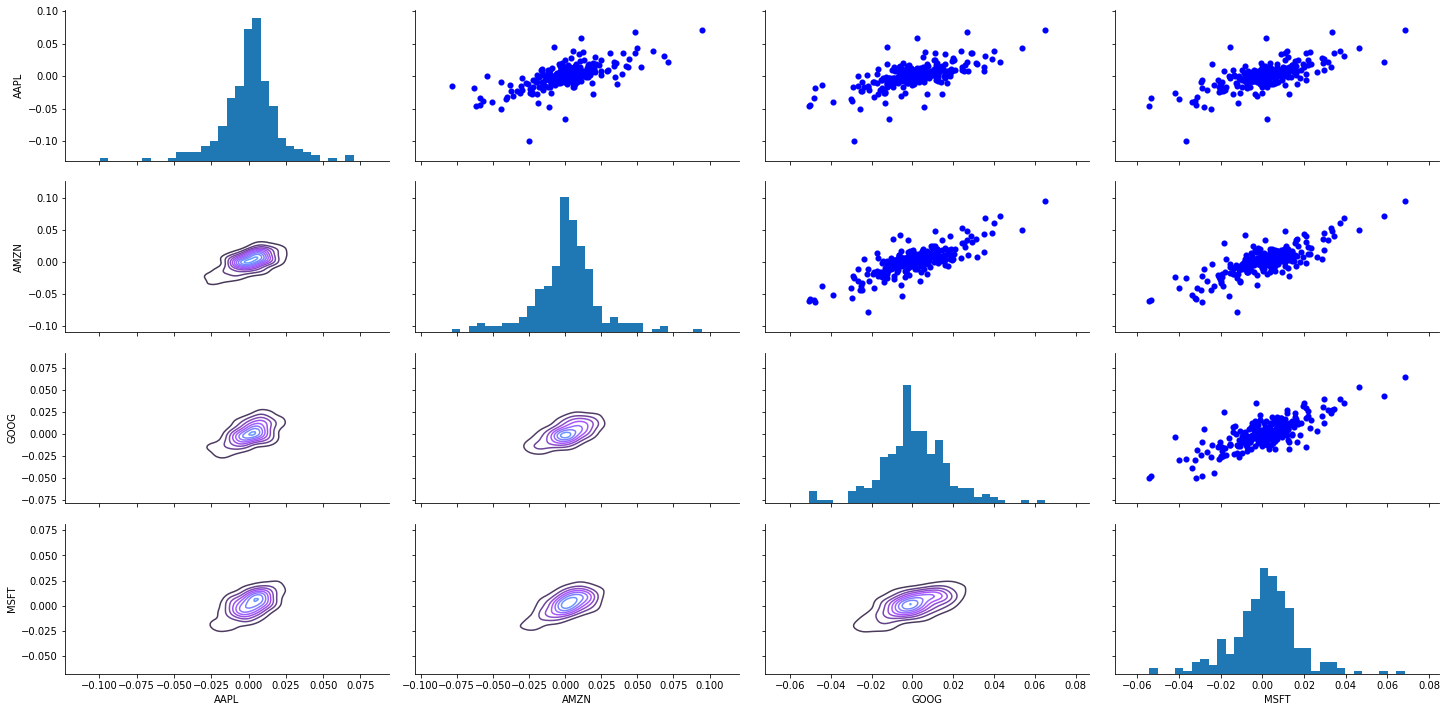

In [19]:
# Also we can create pair of graphs in grid. In this form we have 3 spaces such as diagonals,lower side of diagonal and upper side of diagonal.

returns_fig = sns.PairGrid(tech_return.dropna(),aspect = 2)

returns_fig.map_upper(plt.pyplot.scatter, color = 'blue', linewidth = 0.1)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.pyplot.hist, bins = 30)

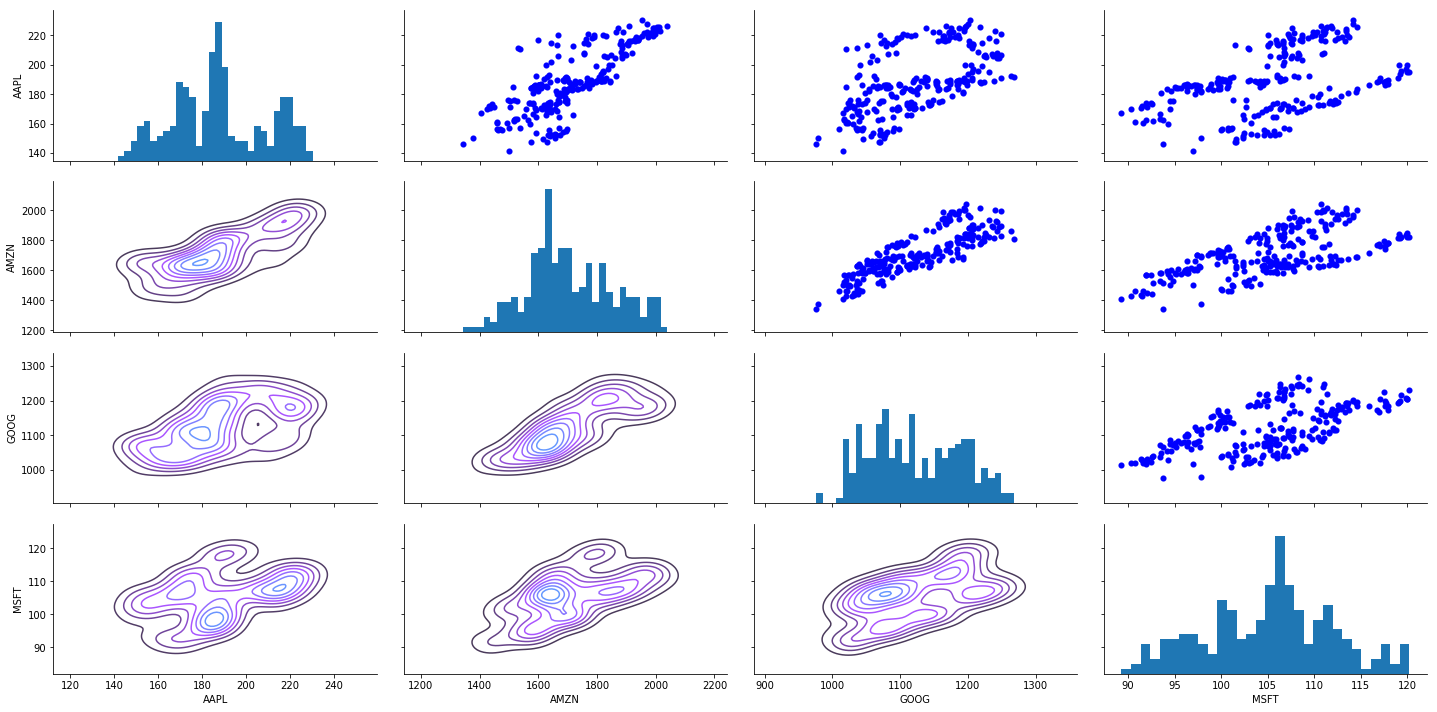

In [20]:
# Also we can create pair of graphs in grid. In this form we have 3 spaces such as diagonals,lower side of diagonal and upper side of diagonal.
# This plots shows close values.
returns_fig = sns.PairGrid(closing_df.dropna(),aspect = 2)

returns_fig.map_upper(plt.pyplot.scatter, color = 'blue', linewidth = 0.1)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.pyplot.hist, bins = 30)

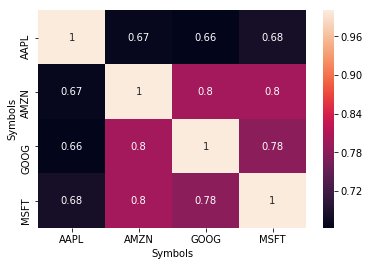

In [30]:
# So let's dive into the correlation between companies deeper with correlation heat map.

corr_tr = tech_return.dropna().corr()   # Correlation matrix for the companies' daily stock return.

sns.heatmap(corr_tr,annot = True, color = 'orange')

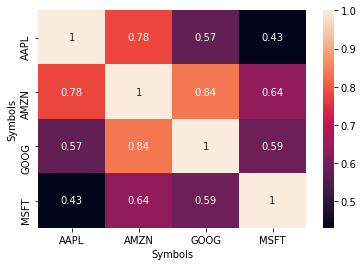

In [31]:
corr_close = closing_df.dropna().corr()   # Correlation matrix for the companies' closing stock values.

sns.heatmap(corr_close,annot = True, color = 'orange')

### Risk analysis part :

In [33]:
# Let's create clear dataframe for our risk analysis.

rets = tech_return.dropna()

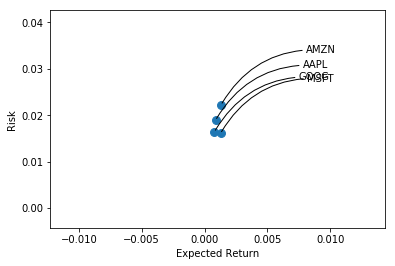

In [68]:
area = np.pi*20

plt.pyplot.scatter(rets.mean(),rets.std(),s = area)

plt.pyplot.xlabel('Expected Return')
plt.pyplot.ylabel('Risk')

for label,x,y in zip (rets.columns, rets.mean(), rets.std()):
    plt.pyplot.annotate(
    label,
    xy = (x,y), xytext = (100,60),
    textcoords = 'offset pixels', ha = 'center', va = 'top',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad = 0.3'))

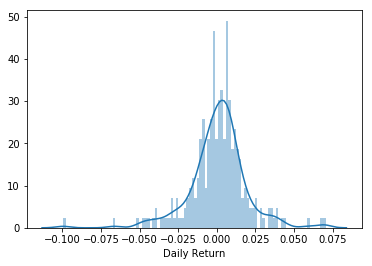

In [69]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100)

In [70]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-10,0.018818,0.021435,0.015944,0.023245
2018-04-11,-0.004675,-0.006385,-0.011312,-0.010982
2018-04-12,0.009858,0.015031,0.012295,0.018724
2018-04-13,0.003388,-0.012226,-0.003138,-0.005343
2018-04-16,0.006238,0.007485,0.008462,0.011710


In [72]:
### Now let's use quantile method to see our daily return number.

rets['AAPL'].quantile(0.05)  # At %5 empirical quantile of daily return is at -0.0296... Means %95 of time our worst daily lost will not exceed %2.96.

-0.029649806519004125

In [74]:
### Now let's use Monte-Carlo method.

#let's set up our time horizon
days = 365

# Now to delta
dt = 1/days

# Now our mu value. Which means mean value of our daily returns
mu = rets.mean()['GOOG']

# Now the sigma value. Which means std value of our daily returns.
sigma = rets.std()['GOOG']

In [75]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

Text(0.5, 1.0, 'Monte-Carlo Analysis for Google')

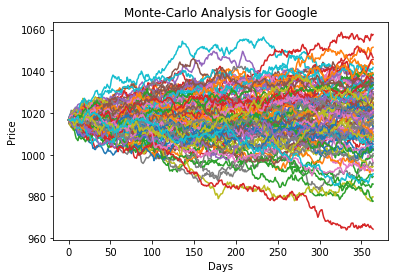

In [85]:
start_price = GOOG['Open'][0]

for run in range(100):
    plt.pyplot.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.pyplot.xlabel('Days')
plt.pyplot.ylabel('Price')
plt.pyplot.title('Monte-Carlo Analysis for Google')

In [88]:
#Let'S run much more this time.

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

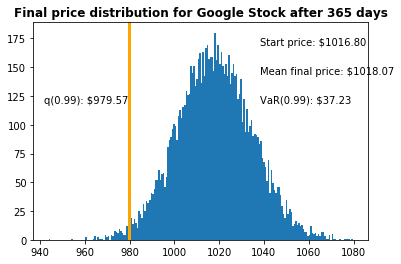

In [100]:
# Let's use quantile and plot a histogram.

q = np.percentile(simulations,1) # %99 percent of our simulations should fit now.

plt.pyplot.hist(simulations, bins = 200)

# Starting Price
plt.pyplot.figtext(0.65,0.8, 'Start price: $%.2f' %start_price)
# Mean ending Price
plt.pyplot.figtext(0.65,0.7, 'Mean final price: $%.2f' %simulations.mean())

# Variance of the price (within the %99 confidence interval)
plt.pyplot.figtext(0.65,0.6, 'VaR(0.99): $%.2f' %(start_price-q))

# Display %1 quantile 
plt.pyplot.figtext(0.15,0.6, 'q(0.99): $%.2f' %q)

# Plot a line at the %1 quantile result
plt.pyplot.axvline(x = q, linewidth = 3, color='orange')

# Title
plt.pyplot.title(u"Final price distribution for Google Stock after %s days" % days, weight = 'bold')

